In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook 

In [3]:
import warnings
warnings.filterwarnings('ignore') #ignorer avertissements sur le nombre de graphiques

Le fichier principal utilisé pour ce clustering est la base de données initiale <a href='http://qa.epidemium.cc/data/epidemiology_dataset/world_bank_data/WorldBank_Data.csv' target='_blank'>WorldBank_Data.csv</a> qui contient les colonnes : 
- area_code : code du pays / de la region
- area : nom du pays / de la region
- year : année pour laquelle les indicateurs sont calculés

Les autres colonnes de 3 à 875 représentes les différents indicateurs. Leurs libellés complètes, ainsi que les méthodologies de calcul respectives sont détaillés dans un autre fichier, <a href='http://qa.epidemium.cc/data/epidemiology_dataset/world_bank_data/WorldBank_Indicators.csv' target='_blank'>WorldBank_Indicators.csv</a> 

In [4]:
df_wb = pd.read_csv('WorldBank_Data.csv', sep=',')
df_wb.head()

,area_code,area,year,SE.ADT.1524.LT.FE.ZS,SE.ADT.1524.LT.FM.ZS,SE.ADT.1524.LT.MA.ZS,SE.ADT.1524.LT.ZS,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.MA.ZS,SE.ADT.LITR.ZS,...,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.NE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.NE.ZS,SL.UEM.TOTL.ZS,SM.POP.NETM,SM.POP.REFG,SM.POP.REFG.OR,SM.POP.TOTL,SM.POP.TOTL.ZS
0,ABW,Aruba,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7466.0,NaN
1,ABW,Aruba,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-3537.0,NaN,NaN,NaN,NaN
3,ABW,Aruba,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_wb_info = pd.read_csv('WorldBank_Indicators.csv', sep=',')
df_wb_info.head()

,Category,Subcategory,Code,Indicator Name,Long definition,Source
0,Economie,National_accounts&Official_development_assista...,DC.DAC.AUSL.CD,"Net bilateral aid flows from DAC donors, Austr...",Net bilateral aid flows from DAC donors are th...,Development Assistance Committee of the Organi...
1,Economie,National_accounts&Official_development_assista...,DC.DAC.AUTL.CD,"Net bilateral aid flows from DAC donors, Austr...",Net bilateral aid flows from DAC donors are th...,Development Assistance Committee of the Organi...
2,Economie,National_accounts&Official_development_assista...,DC.DAC.BELL.CD,"Net bilateral aid flows from DAC donors, Belgi...",Net bilateral aid flows from DAC donors are th...,Development Assistance Committee of the Organi...
3,Economie,National_accounts&Official_development_assista...,DC.DAC.CANL.CD,"Net bilateral aid flows from DAC donors, Canad...",Net bilateral aid flows from DAC donors are th...,Development Assistance Committee of the Organi...
4,Economie,National_accounts&Official_development_assista...,DC.DAC.CECL.CD,"Net bilateral aid flows from DAC donors, Europ...",Net bilateral aid flows from DAC donors are th...,Development Assistance Committee of the Organi...


On fait une sélection des indicateurs parmi ceux avec moins de valeurs manquantes. (voir notebook Traitement base de données)

<table><tr><th>Category</th><th>Indicator code</th><th>Indicator description</th></tr><tr><td>Education</td><td>SE.PRM.DURS</td><td>Primary education, duration (years)</td></tr><tr><td>Education</td><td>SE.PRE.DURS</td><td>Preprimary education, duration (years)</td></tr><tr><td>Education</td><td>SE.SEC.DURS</td><td>Secondary education, duration (years)</td></tr><tr><td>Environnement</td><td>SP.URB.TOTL.IN.ZS</td><td>Urban population (% of total)</td></tr><tr><td>Environnement</td><td>SP.URB.GROW</td><td>Urban population growth (annual %)</td></tr><tr><td>Environnement</td><td>AG.SRF.TOTL.K2</td><td>Surface area (sq. km)</td></tr><tr><td>Environnement</td><td>EN.POP.DNST</td><td>Population density (people per sq. km of land area)</td></tr><tr><td>Environnement</td><td>EN.ATM.NOXE.KT.CE</td><td>Nitrous oxide emissions (thousand metric tons of CO2 equivalent)</td></tr><tr><td>Environnement</td><td>EN.ATM.METH.KT.CE</td><td>Methane emissions (kt of CO2 equivalent)</td></tr><tr><td>Environnement</td><td>AG.LND.AGRI.K2</td><td>Agricultural land (sq. km)</td></tr><tr><td>Environnement</td><td>EN.ATM.GHGO.KT.CE</td><td>Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)</td></tr><tr><td>Environnement</td><td>AG.LND.AGRI.ZS</td><td>Agricultural land (% of land area)</td></tr><tr><td>Environnement</td><td>AG.PRD.FOOD.XD</td><td>Food production index (2004-2006 = 100)</td></tr><tr><td>Environnement</td><td>AG.PRD.LVSK.XD</td><td>Livestock production index (2004-2006 = 100)</td></tr><tr><td>Environnement</td><td>AG.PRD.CROP.XD</td><td>Crop production index (2004-2006 = 100)</td></tr><tr><td>Environnement</td><td>EN.ATM.GHGT.KT.CE</td><td>Total greenhouse gas emissions (kt of CO2 equivalent)</td></tr><tr><td>Environnement</td><td>EN.ATM.CO2E.GF.ZS</td><td>CO2 emissions from gaseous fuel consumption (% of total)</td></tr><tr><td>Environnement</td><td>EN.ATM.CO2E.LF.ZS</td><td>CO2 emissions from liquid fuel consumption (% of total)</td></tr><tr><td>Environnement</td><td>EN.ATM.CO2E.SF.ZS</td><td>CO2 emissions from solid fuel consumption (% of total)</td></tr><tr><td>Environnement</td><td>NY.GDP.FRST.RT.ZS</td><td>Forest rents (% of GDP)</td></tr><tr><td>Environnement</td><td>NY.GDP.MINR.RT.ZS</td><td>Mineral rents (% of GDP)</td></tr><tr><td>Environnement</td><td>EN.ATM.CO2E.LF.KT</td><td>CO2 emissions from liquid fuel consumption (kt)</td></tr><tr><td>Environnement</td><td>EN.ATM.METH.AG.KT.CE</td><td>Agricultural methane emissions (thousand metric tons of CO2 equivalent)</td></tr><tr><td>Environnement</td><td>EN.ATM.METH.EG.KT.CE</td><td>Methane emissions in energy sector (thousand metric tons of CO2 equivalent)</td></tr><tr><td>Environnement</td><td>EN.ATM.NOXE.AG.KT.CE</td><td>Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)</td></tr><tr><td>Environnement</td><td>EN.ATM.NOXE.EG.KT.CE</td><td>Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)</td></tr><tr><td>Environnement</td><td>NY.GDP.TOTL.RT.ZS</td><td>Total natural resources rents (% of GDP)</td></tr><tr><td>Environnement</td><td>EN.ATM.CO2E.KT</td><td>CO2 emissions (kt)</td></tr><tr><td>Environnement</td><td>EN.ATM.CO2E.PC</td><td>CO2 emissions (metric tons per capita)</td></tr><tr><td>Health</td><td>SP.POP.GROW</td><td>Population growth (annual %)</td></tr><tr><td>Health</td><td>SP.DYN.CBRT.IN</td><td>Birth rate, crude (per 1,000 people)</td></tr><tr><td>Health</td><td>SP.DYN.CDRT.IN</td><td>Death rate, crude (per 1,000 people)</td></tr><tr><td>Health</td><td>SP.DYN.TFRT.IN</td><td>Fertility rate, total (births per woman)</td></tr><tr><td>Health</td><td>SP.ADO.TFRT</td><td>Adolescent fertility rate (births per 1,000 women ages 15-19)</td></tr><tr><td>Health</td><td>SP.DYN.LE00.FE.IN</td><td>Life expectancy at birth, female (years)</td></tr><tr><td>Health</td><td>SP.DYN.LE00.IN</td><td>Life expectancy at birth, total (years)</td></tr><tr><td>Health</td><td>SP.POP.DPND</td><td>Age dependency ratio (% of working-age population)</td></tr><tr><td>Health</td><td>SP.DYN.AMRT.FE</td><td>Mortality rate, adult, female (per 1,000 female adults)</td></tr><tr><td>Health</td><td>SP.DYN.AMRT.MA</td><td>Mortality rate, adult, male (per 1,000 male adults)</td></tr><tr><td>Infrastructure</td><td>IT.CEL.SETS</td><td>Mobile cellular subscriptions</td></tr><tr><td>Infrastructure</td><td>IT.MLT.MAIN</td><td>Fixed telephone subscriptions</td></tr><tr><td>National_accounts</td><td>NY.ADJ.AEDU.GN.ZS</td><td>Adjusted savings: education expenditure (% of GNI)</td></tr><tr><td>National_accounts</td><td>NY.GDP.MKTP.CD</td><td>GDP (current USD)</td></tr><tr><td>National_accounts</td><td>NY.GDP.PCAP.CD</td><td>GDP per capita (current USD)</td></tr>
</table>

Afin de récupérer uniquement les pays et non pas les groupes de pays ou autres territoires, on élimine ces derniers à l'aide d'un <a href='https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups' target='_blank'>document complémentaire</a> récupéré de World Bank avec les regroupements utilisés. Les critères de regroupement incluent : région géographique, niveau de revenu, petits états, groupes de prêt, division démographique, autres groupes.

In [6]:
#lecture fichier groupes de pays
df_groups = pd.read_csv('countries_groups.csv', sep=',')
df_groups.head()

,Grouping_criterion,Group
0,Region,East Asia & Pacific
1,Region,Europe & Central Asia
2,Region,Latin America & Caribbean
3,Region,Middle East & North Africa
4,Region,North America


In [7]:
#exclure groupes de pays
tmp = pd.merge(df_wb[['area_code', 'area']], 
         df_groups, how='inner', 
         left_on='area', right_on='Group')['area_code']

df_wb = df_wb[-df_wb['area_code'].isin(tmp)]

In [8]:
#utiliser mêmes libellés de pays que pour la prédiction
df_pred = pd.read_csv('data_pred_wb.csv', sep=',', low_memory=False)
tmp2 = pd.merge(df_wb[['area_code','area']], 
                df_pred[['Country']], 
                how='inner', 
                left_on='area', right_on='Country')['area_code']
df_wb = df_wb[df_wb['area_code'].isin(tmp2)]

In [9]:
#éliminer colonne redondante (le code du pays n'est plus utilisé par la suite)
df_wb.drop(['area_code'], axis=1, inplace=True)

In [13]:
#sélection d'indicateurs
indicators = ['SP.URB.TOTL.IN.ZS',	'SP.URB.GROW',	'SP.POP.GROW',	'SE.PRM.DURS',	'AG.SRF.TOTL.K2',	'SE.PRE.DURS',	'EN.POP.DNST',	'SE.SEC.DURS',	'SP.DYN.CBRT.IN',	'SP.DYN.CDRT.IN',	'NY.ADJ.AEDU.GN.ZS',	'SP.DYN.TFRT.IN',	'SP.ADO.TFRT',	'SP.DYN.LE00.FE.IN',	'SP.DYN.LE00.IN',	'SP.POP.DPND',	'SP.DYN.AMRT.FE',	'SP.DYN.AMRT.MA',	'EN.ATM.NOXE.KT.CE',	'EN.ATM.METH.KT.CE',	'AG.LND.AGRI.K2',	'EN.ATM.GHGO.KT.CE',	'AG.LND.AGRI.ZS',	'AG.PRD.FOOD.XD',	'IT.CEL.SETS',	'AG.PRD.LVSK.XD',	'AG.PRD.CROP.XD',	'IT.MLT.MAIN',	'EN.ATM.GHGT.KT.CE',	'EN.ATM.CO2E.GF.ZS',	'EN.ATM.CO2E.LF.ZS',	'EN.ATM.CO2E.SF.ZS',	'NY.GDP.FRST.RT.ZS',	'NY.GDP.MINR.RT.ZS',	'EN.ATM.CO2E.LF.KT',	'EN.ATM.METH.AG.KT.CE',	'EN.ATM.METH.EG.KT.CE',	'EN.ATM.NOXE.AG.KT.CE',	'EN.ATM.NOXE.EG.KT.CE',	'NY.GDP.TOTL.RT.ZS',	'EN.ATM.CO2E.KT',	'EN.ATM.CO2E.PC',	'NY.GDP.MKTP.CD',	'NY.GDP.PCAP.CD']
df_wb = df_wb[indicators + ['area', 'year']]

<IPython.core.display.Javascript object>


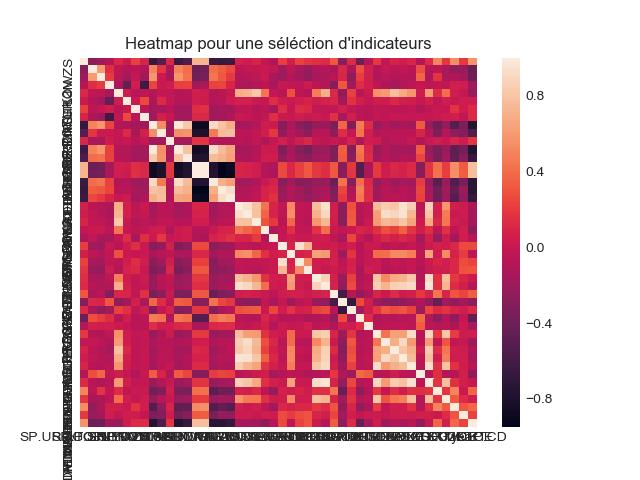

Text(0.5,1,"Heatmap pour une séléction d'indicateurs")

In [33]:
#graphique des correlations entre les indicateurs
f, ax = plt.subplots()
corr = df_wb.corr()
_ = sns.heatmap(corr)
ax.set_title("Heatmap pour une séléction d'indicateurs")

On voit qu'il existe des fortes corrélations entre beaucoup d'indicateurs, la plupart positives, mais aussi négatives.

In [15]:
#standardiser les features pour la classification
from sklearn.preprocessing import StandardScaler
#remplacer les valeurs manquantes aussi par les méthodes forward et backward
X = df_wb[indicators].fillna(method='ffill').fillna(method='bfill')
X_std = StandardScaler().fit_transform(X)

<font color="#660066" size=6><u>
Analyse en Composantes Principales
</font></u>

On utilise une ACP pour réduire l'espace des paramètres et projetter nos pays.

In [39]:
from sklearn.decomposition import PCA
nb_features = X_std.shape[1]
pca = PCA(n_components=nb_features) #nombre maximal de composantes principales
projected = pca.fit_transform(X_std)

np.set_printoptions(precision=3) #affichage: nombre de décimales
np.set_printoptions(suppress=True) #affichage: éliminer notation scientifique pour les petits nombres
print('Pourcentage de variance expliquée par composante : \n ' , pca.explained_variance_ratio_)
print('Pourcentage cummulé de variance expliquée : \n ', np.cumsum(pca.explained_variance_ratio_))

Pourcentage de variance expliquée par composante : 
  [ 0.258  0.19   0.056  0.053  0.046  0.042  0.034  0.029  0.027  0.024
  0.023  0.019  0.019  0.018  0.017  0.016  0.015  0.013  0.012  0.011
  0.01   0.009  0.008  0.008  0.007  0.006  0.005  0.005  0.004  0.004
  0.003  0.002  0.002  0.001  0.001  0.001  0.001  0.001  0.     0.     0.
  0.     0.     0.   ]
Pourcentage cummulé de variance expliquée : 
  [ 0.258  0.448  0.504  0.557  0.603  0.645  0.679  0.709  0.735  0.76
  0.782  0.802  0.82   0.838  0.855  0.871  0.886  0.898  0.91   0.921
  0.931  0.94   0.949  0.957  0.963  0.97   0.975  0.979  0.984  0.987
  0.99   0.992  0.994  0.995  0.996  0.997  0.998  0.999  0.999  0.999  1.
  1.     1.     1.   ]


<IPython.core.display.Javascript object>


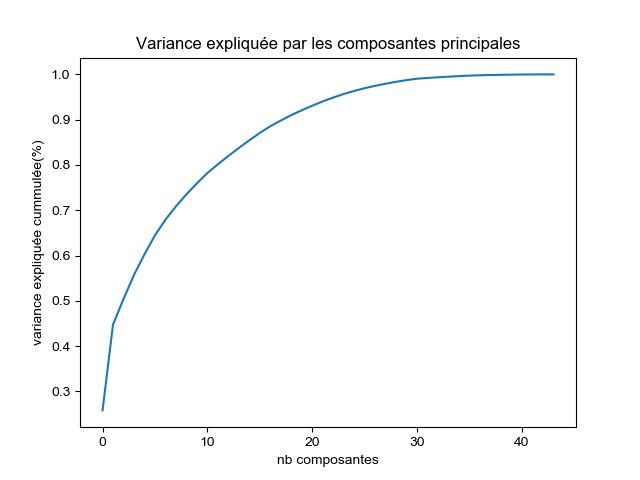

Text(0.5,1,'Variance expliquée par les composantes principales')

In [17]:
#nombre de composantes versus variance cummulée
plt.figure() #créer un nouveau graphique
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nb composantes')
plt.ylabel('variance expliquée cummulée(%)')
plt.title("Variance expliquée par les composantes principales")

On observe que la plupart de la variance est générée par un nombre limité de composantes, donc il nous paraît raisonnable d'en retenir deux pour pouvoir projeter les pays dans un espace de dimension réduite.

<IPython.core.display.Javascript object>


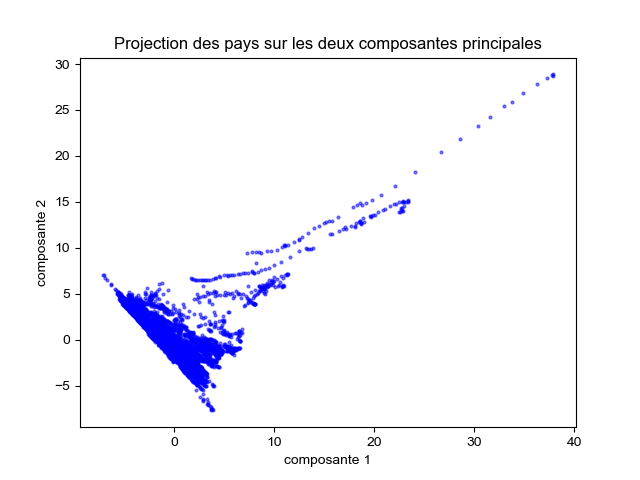

In [18]:
#ACP avec 2 composantes
pca = PCA(n_components=2) 
projected = pca.fit_transform(X_std)
#graphique des pays sur les deux composantes
plt.figure() 
plt.plot(projected[:, 0], projected[:, 1], 'o', markersize=2, color='blue', alpha=0.5)
plt.xlabel('composante 1')
plt.ylabel('composante 2')
plt.title('Projection des pays sur les deux composantes principales')
plt.show()

En utilisant cette projection des pays sur les deux composantes pricipales qui expliquent la moitié de la variance, on souhaite investiguer un regroupement dans 4-5 groupes. Par la suite, on appliquera un algorithme KMeans pour identifier ces groupes de pays similaires.

<font color="#660066" size=6><u>
Clustering
</font></u>

Le clustering avec 4 groupes semble donner les résultats les plus cohérents en termes de regroupement de pays similaires. 

In [19]:
#clustering des pays - KMeans
from sklearn.cluster import KMeans
clus = KMeans(4) #nombre de groupes
clus.fit(X_std)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
pred = clus.predict(X_std) #cluster prédit pour chaque point

In [20]:
from sklearn.metrics import silhouette_score
ps = pd.DataFrame(projected) #transfromer array en data frame 

clusterer = KMeans(n_clusters=4).fit(ps)
centers = clusterer.cluster_centers_ #coordonnées des centres des clusters
c_preds = clusterer.predict(ps) #cluster prédit pour chaque point
print('Coordonnées des centres des clusters : \n ', centers)

Coordonnées des centres des clusters : 
  [[  7.422   5.729]
 [ -2.752   2.078]
 [ 22.007  15.748]
 [  1.206  -1.839]]


<IPython.core.display.Javascript object>


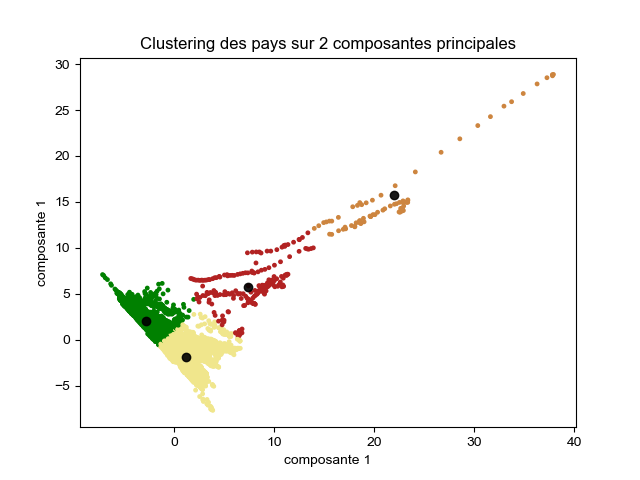

In [21]:
import matplotlib
fig = plt.figure()
colors = ['firebrick','green','peru','khaki']
colored = [colors[k] for k in c_preds]
plt.scatter(ps[0],ps[1],s=6,  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=6, color='black', alpha=0.9, label=''+str(ci))

plt.xlabel('composante 1')
plt.ylabel('composante 1')
plt.title('Clustering des pays sur 2 composantes principales')
plt.show()

Le clustering divise le bloc homogène avec le nombre le plus important de pays en deux, principalement sur la composante 1(horizontale). Deux autres groupes resortent divisés par la composante 2(verticale), parmi les pays moins nombreux et plus hétérogènes. 

In [22]:
#ajouter le cluster prédit aux tableau initial
df_wb = df_wb.copy()
df_wb['cluster'] = c_preds

df_wb.head(10)

,SP.URB.TOTL.IN.ZS,SP.URB.GROW,SP.POP.GROW,SE.PRM.DURS,AG.SRF.TOTL.K2,SE.PRE.DURS,EN.POP.DNST,SE.SEC.DURS,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,...,EN.ATM.NOXE.AG.KT.CE,EN.ATM.NOXE.EG.KT.CE,NY.GDP.TOTL.RT.ZS,EN.ATM.CO2E.KT,EN.ATM.CO2E.PC,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,area,year,cluster
0,50.624,0.549986,0.579003,6.0,180.0,2.0,328.138889,5.0,24.099,5.671,...,0.706316,0.367760,NaN,NaN,NaN,NaN,NaN,Aruba,1970,3
1,50.609,0.600182,0.629522,6.0,180.0,2.0,330.211111,5.0,23.505,5.698,...,0.701674,0.367675,NaN,NaN,NaN,NaN,NaN,Aruba,1971,3
2,50.593,0.656066,0.689097,6.0,180.0,2.0,332.494444,5.0,23.068,5.746,...,0.704372,0.367683,NaN,NaN,NaN,NaN,NaN,Aruba,1972,3
3,50.578,0.622255,0.649526,6.0,180.0,2.0,334.661111,5.0,22.760,5.812,...,0.700662,0.376658,NaN,NaN,NaN,NaN,NaN,Aruba,1973,3
4,50.563,0.442109,0.473652,6.0,180.0,2.0,336.250000,5.0,22.561,5.892,...,0.699875,0.374573,NaN,NaN,NaN,NaN,NaN,Aruba,1974,3
5,50.548,0.186083,0.214557,6.0,180.0,2.0,336.972222,5.0,22.452,5.981,...,0.704201,0.375536,NaN,NaN,NaN,NaN,NaN,Aruba,1975,3
6,50.532,-0.140346,-0.108871,6.0,180.0,2.0,336.605556,5.0,22.414,6.070,...,0.702771,0.597055,NaN,NaN,NaN,NaN,NaN,Aruba,1976,3
7,50.517,-0.399267,-0.368733,6.0,180.0,2.0,335.366667,5.0,22.424,6.157,...,0.709692,0.600722,NaN,NaN,NaN,NaN,NaN,Aruba,1977,3
8,50.502,-0.460149,-0.431636,6.0,180.0,2.0,333.922222,5.0,22.454,6.237,...,0.706671,1.303366,NaN,NaN,NaN,NaN,NaN,Aruba,1978,3
9,50.487,-0.244080,-0.213184,6.0,180.0,2.0,333.211111,5.0,22.478,6.309,...,0.709329,1.532186,NaN,NaN,NaN,NaN,NaN,Aruba,1979,3


In [23]:
#pays qui changent de cluster au fil des années
df_wb.groupby(['area','cluster'])['year'].count()

area                    cluster
Afghanistan             1          46
Albania                 3          46
Algeria                 1          16
                        3          30
Angola                  1          46
Antigua and Barbuda     1           1
                        3          45
Argentina               3          46
Armenia                 3          46
Aruba                   3          46
Australia               0          13
                        3          33
Austria                 3          46
Azerbaijan              3          46
Bahamas, The            3          46
Bahrain                 1           1
                        3          45
Bangladesh              1          26
                        3          20
Barbados                3          46
Belarus                 3          46
Belgium                 3          46
Belize                  1          20
                        3          26
Benin                   1          46
Bhutan            

In [24]:
print('Pays qui change de cluster:')
df_wb[df_wb.area == 'Algeria'][['area', 'year', 'cluster']]

Pays qui change de cluster:


,area,year,cluster
2595,Algeria,1970,1
2596,Algeria,1971,1
2597,Algeria,1972,1
2598,Algeria,1973,1
2599,Algeria,1974,1
2600,Algeria,1975,1
2601,Algeria,1976,1
2602,Algeria,1977,1
2603,Algeria,1978,1
2604,Algeria,1979,1


In [25]:
print('Pays qui ne change pas de cluster:')
df_wb[df_wb.area == 'France'][['area', 'year', 'cluster']]

Pays qui ne change pas de cluster:


,area,year,cluster
3378,France,1970,3
3379,France,1971,3
3380,France,1972,3
3381,France,1973,3
3382,France,1974,3
3383,France,1975,3
3384,France,1976,3
3385,France,1977,3
3386,France,1978,3
3387,France,1979,3


Au fil des années, certains pays peuvent voir leur situation économique, démographique ou écologique changer, ce qui se traduit par un changement de group auquel ils appartiennent - c'est l'exemple de l'Algérie. 

En revanche, un pays plus stable comme la France ne connait pas une évolution similaire - elle reste dans le meme groupe pour toutes les années enregistrées. 

## Description des clusters obtenus

<IPython.core.display.Javascript object>


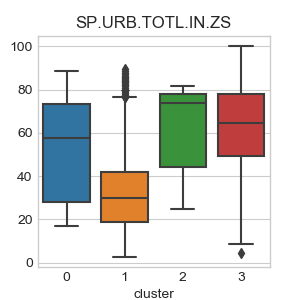

<IPython.core.display.Javascript object>


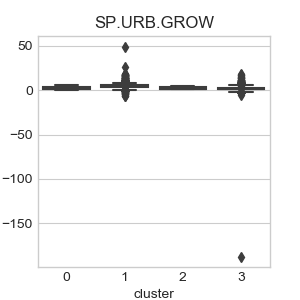

<IPython.core.display.Javascript object>


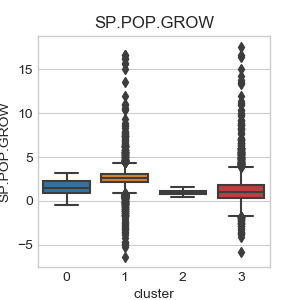

<IPython.core.display.Javascript object>


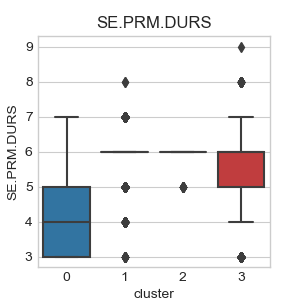

<IPython.core.display.Javascript object>


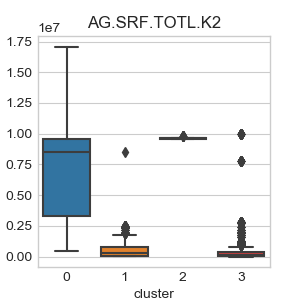

<IPython.core.display.Javascript object>


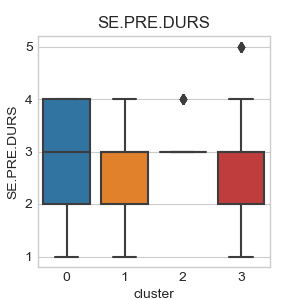

<IPython.core.display.Javascript object>


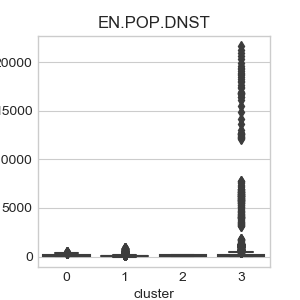

<IPython.core.display.Javascript object>


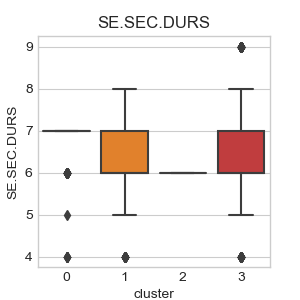

<IPython.core.display.Javascript object>


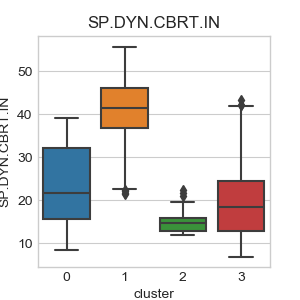

<IPython.core.display.Javascript object>


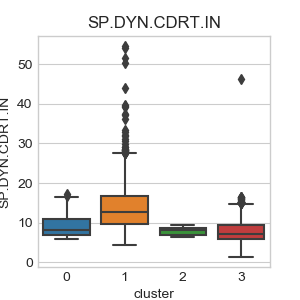

<IPython.core.display.Javascript object>


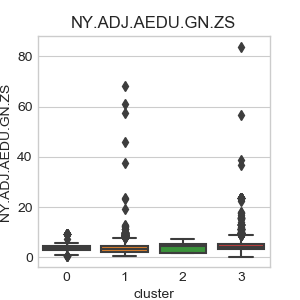

<IPython.core.display.Javascript object>


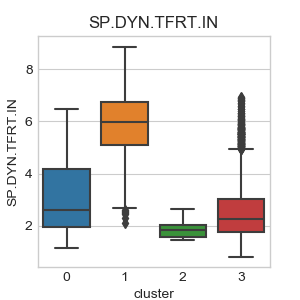

<IPython.core.display.Javascript object>


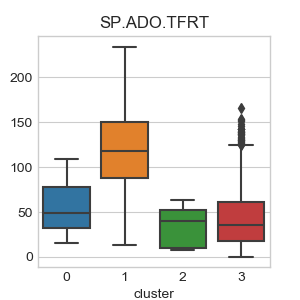

<IPython.core.display.Javascript object>


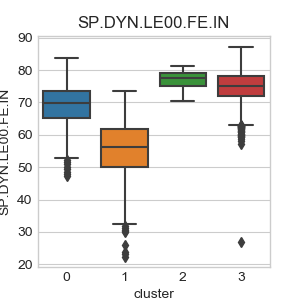

<IPython.core.display.Javascript object>


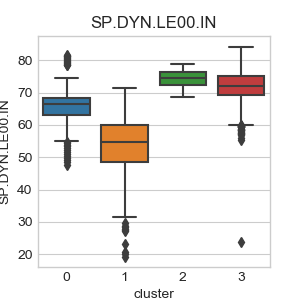

<IPython.core.display.Javascript object>


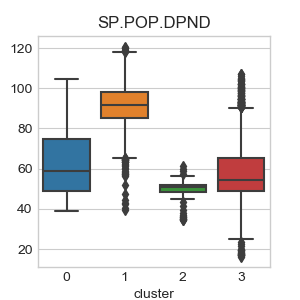

<IPython.core.display.Javascript object>


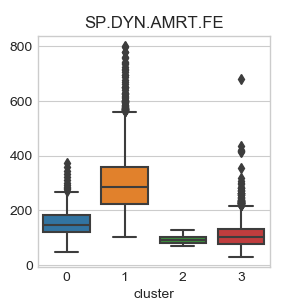

<IPython.core.display.Javascript object>


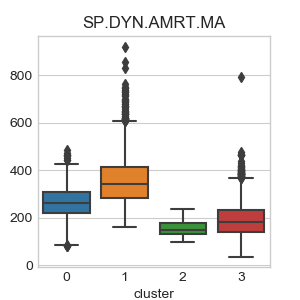

<IPython.core.display.Javascript object>


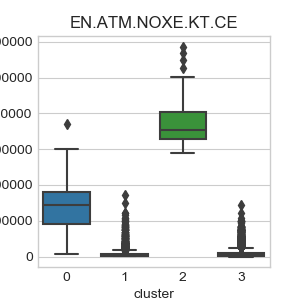

<IPython.core.display.Javascript object>


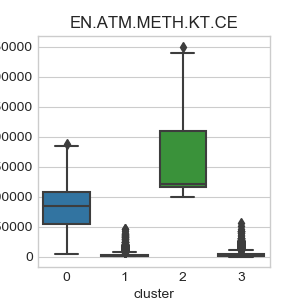

<IPython.core.display.Javascript object>


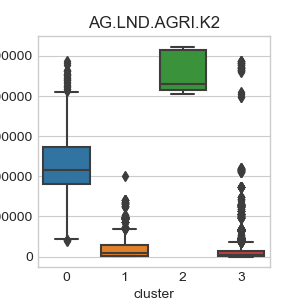

<IPython.core.display.Javascript object>


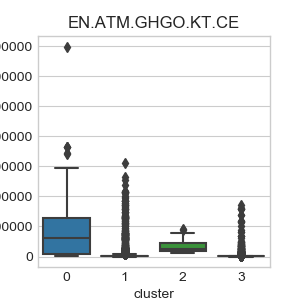

<IPython.core.display.Javascript object>


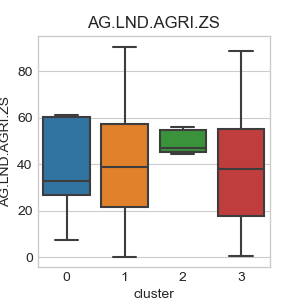

<IPython.core.display.Javascript object>


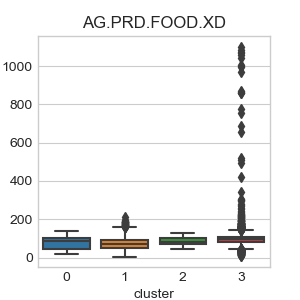

<IPython.core.display.Javascript object>


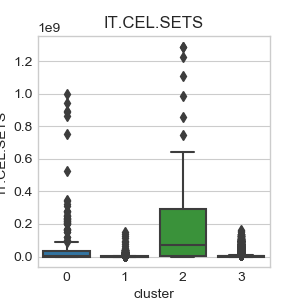

<IPython.core.display.Javascript object>


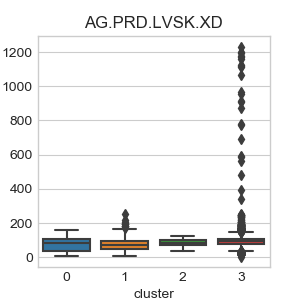

<IPython.core.display.Javascript object>


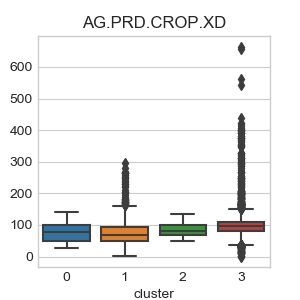

<IPython.core.display.Javascript object>


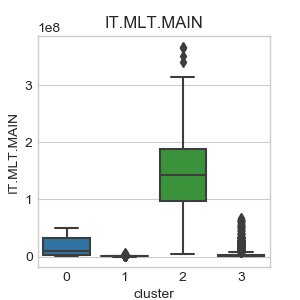

<IPython.core.display.Javascript object>


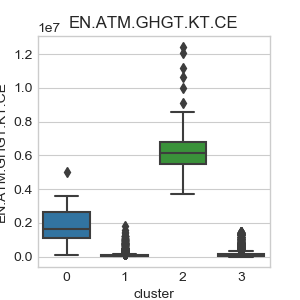

<IPython.core.display.Javascript object>


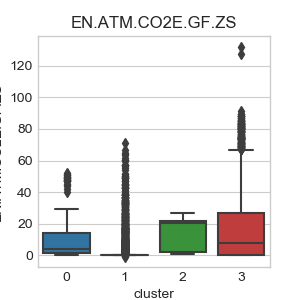

<IPython.core.display.Javascript object>


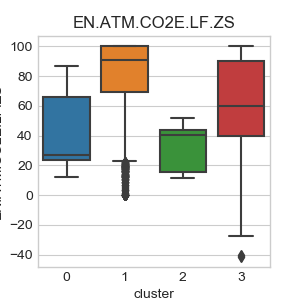

<IPython.core.display.Javascript object>


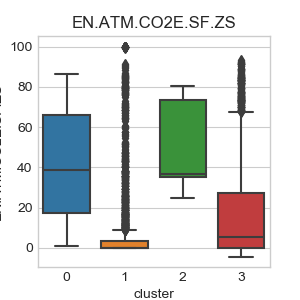

<IPython.core.display.Javascript object>


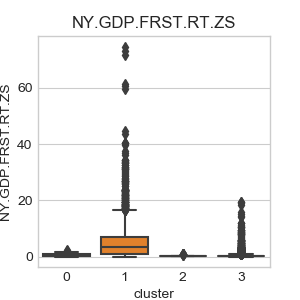

<IPython.core.display.Javascript object>


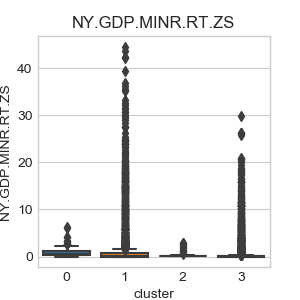

<IPython.core.display.Javascript object>


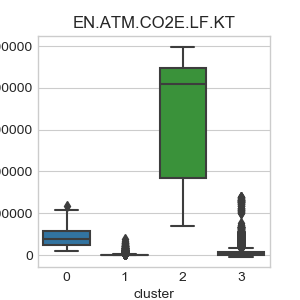

<IPython.core.display.Javascript object>


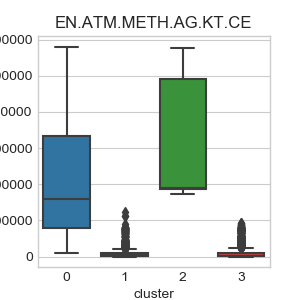

<IPython.core.display.Javascript object>


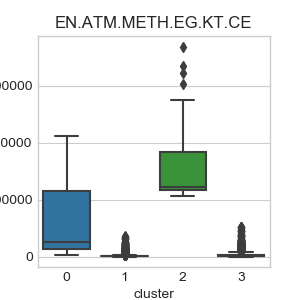

<IPython.core.display.Javascript object>


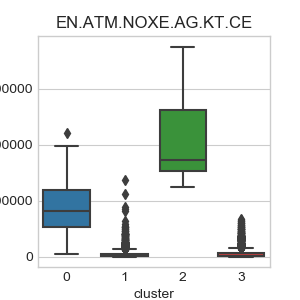

<IPython.core.display.Javascript object>


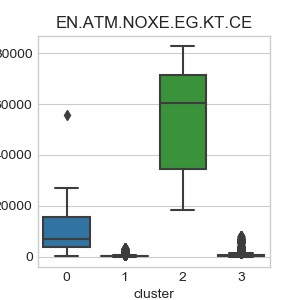

<IPython.core.display.Javascript object>


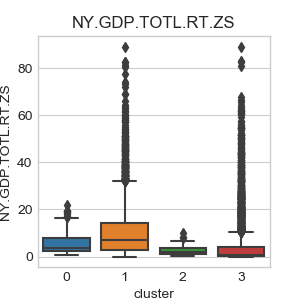

<IPython.core.display.Javascript object>


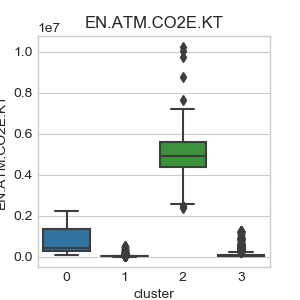

<IPython.core.display.Javascript object>


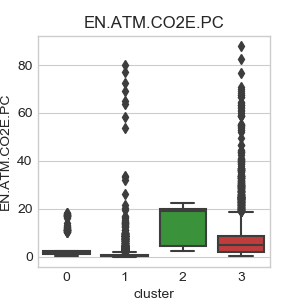

<IPython.core.display.Javascript object>


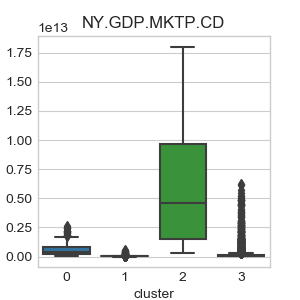

<IPython.core.display.Javascript object>


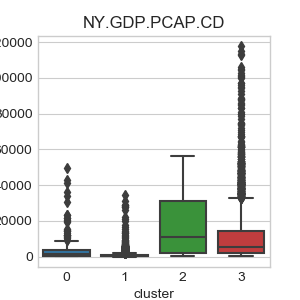

In [28]:
#boxplots pour tous les indicateurs
import seaborn as sns
sns.set_style("whitegrid")

for i in indicators[0:44]:
    plt.figure(figsize=(3, 3))
    ax = sns.boxplot(x="cluster", y=i, data=df_wb)
    ax.set_title(i)
    #plt.show()

Parmi toutes ces variables, on va en sélectionner 4 pour caractériser les clusters.

<IPython.core.display.Javascript object>


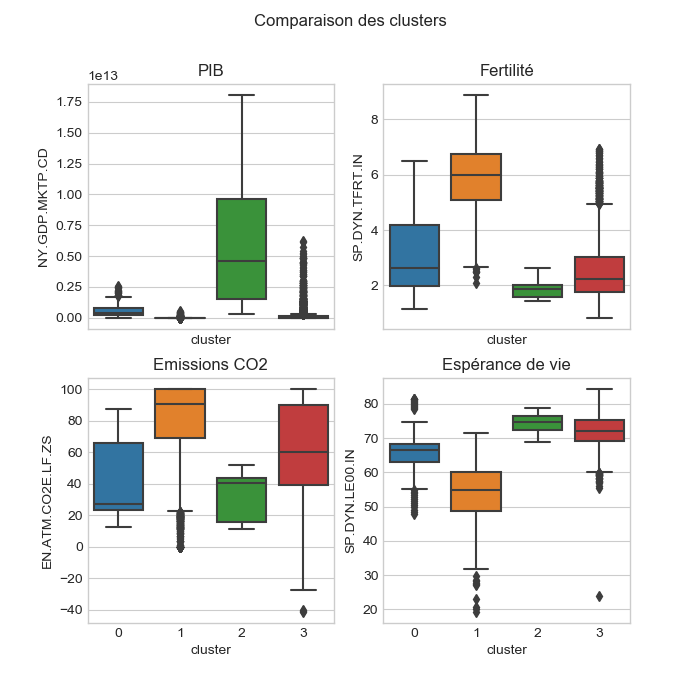

Text(0.5,0.98,'Comparaison des clusters')

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
my_pal = {"0": "g", "1": "b", "3":"m", "4":"m"}

f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex='col')
#sns.boxplot(x="cluster", y="NY.GDP.MKTP.CD", data=df_wb, ax=axes[0, 0], palette=my_pal) #PIB 
ax1 = sns.boxplot(x="cluster", y="NY.GDP.MKTP.CD", data=df_wb, ax=axes[0, 0]) #PIB 
ax2 = sns.boxplot(x="cluster", y="SP.DYN.TFRT.IN", data=df_wb, ax=axes[0, 1]) #fertilité
ax3 = sns.boxplot(x="cluster", y="EN.ATM.CO2E.LF.ZS", data=df_wb, ax=axes[1, 0]) #CO2
ax4 = sns.boxplot(x="cluster", y="SP.DYN.LE00.IN", data=df_wb, ax=axes[1, 1]) #espérance de vie

ax1.title.set_text('PIB')
ax2.title.set_text('Fertilité')
ax3.title.set_text('Emissions CO2')
ax4.title.set_text('Espérance de vie')

plt.suptitle('Comparaison des clusters')

Interprétation des clusters : 
-	Groupe 0 : PIB élevé, fertilité relativement faible, plus petites émissions de CO2, espérance de vie moyenne avec importants points aberrants 
-	Groupe 1 : PIB faible, fertilité très élevée, fortes émissions de CO2, espérance de vie courte
-	Groupe 2 : PIB le plus élevé, fertilité faible, émissions de CO2 relativement réduites et une relativement longue espérance de vie
-	Groupe 3 : PIB faible avec variation importante, fertilité moyenne, espérance de vie moyenne

## Projection des pays sur la carte

In [73]:
#remplacer noms pays pour trouver correspondance avec nom cartopy
df_wb.replace(['Venezuela, RB', 'Congo, Rep.', 'Congo, Dem. Rep.', 'Egypt, Arab Rep.', 'Iran, Islamic Rep.', 
                      'Yemen, Rep.',"Cote d'Ivoire","Korea, Rep.","Korea, Dem. People’s Rep."], 
                     ['Venezuela', 'Republic of the Congo', 'Democratic Republic of the Congo','Egypt', 'Iran', 
                      'Yemen',"Côte d'Ivoire","Republic of Korea","Dem. Rep. Korea"], inplace=True)

In [74]:
#construire liste de pays par cluster
c0 = df_wb[(df_wb['year']==2015) & (df_wb['cluster']==0)][['area']]
c1 = df_wb[(df_wb['year']==2015) & (df_wb['cluster']==1)][['area']]
c2 = df_wb[(df_wb['year']==2015) & (df_wb['cluster']==2)][['area']]
c3 = df_wb[(df_wb['year']==2015) & (df_wb['cluster']==3)][['area']]

In [98]:
print("Pays appartenant au premier cluster : \n")
print(c0)

Pays appartenant au premier cluster : 

                                 area
45                              Aruba
183                           Albania
321              United Arab Emirates
367                         Argentina
413                           Armenia
504               Antigua and Barbuda
550                         Australia
596                           Austria
642                        Azerbaijan
734                           Belgium
872                        Bangladesh
918                          Bulgaria
964                           Bahrain
1010                     Bahamas, The
1056           Bosnia and Herzegovina
1102                          Belarus
1148                           Belize
1240                          Bolivia
1332                         Barbados
1378                Brunei Darussalam
1424                           Bhutan
1470                         Botswana
1562                           Canada
1654                      Switzerland
1700      

<IPython.core.display.Javascript object>


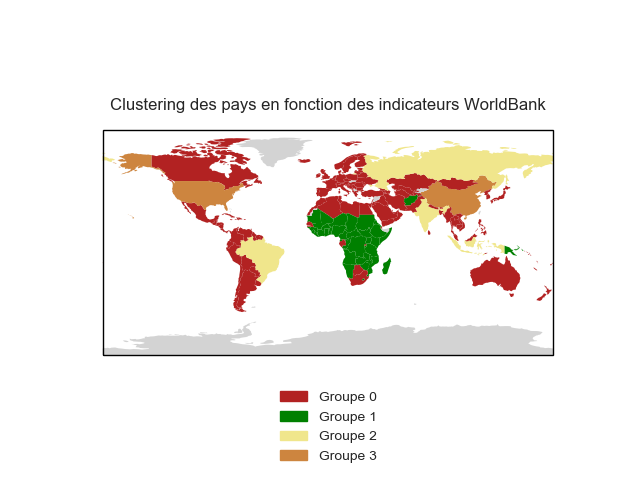

China
United States


In [93]:
#projection groupes pays
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import matplotlib.patches as mpatches

plt.figure() 
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m',category='cultural', name=shapename)
ax = plt.axes(projection=ccrs.PlateCarree())
countries = shpreader.Reader(countries_shp).records()

ax.set_title("Clustering des pays en fonction des indicateurs WorldBank")
for country in countries:
    if country.attributes['NAME_LONG'] in list(c0.area):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor='firebrick') #red
    
    elif country.attributes['NAME_LONG'] in list(c1.area):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor='green')      

    elif country.attributes['NAME_LONG'] in list(c2.area):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor='peru') #orange
        print(country.attributes['NAME_LONG'])
        
    elif country.attributes['NAME_LONG'] in list(c3.area):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor='khaki') #yellow
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor='lightgrey')
G0 = mpatches.Patch(color='firebrick', label='Groupe 0')
G1 = mpatches.Patch(color='green', label='Groupe 1')
G2 = mpatches.Patch(color='khaki', label='Groupe 2')
G3 = mpatches.Patch(color='peru', label='Groupe 3')

na = mpatches.Patch(color='lightgrey', label='non renseigné')

box = ax.get_position()
plt.legend(handles=[G0,G1,G2,G3], loc='upper center', bbox_to_anchor=(0.5, -0.05) ) 


plt.show()

Pour l’année la plus récente, la composition des clusters est : 
- Groupe 0 : pays de l’Europe, le Mexique, Canada, Amérique du Sud, l’Australie 
- Groupe 1 : la Russie, le Brésil, l’Inde, des iles  de l’Asie de Sud-Est
- Groupe 2 : Etats-Unis, Chine
- Groupe 3 : pays de l’Afrique
